# Прогнозирование оттока клиентов для телеком-оператора

In [2]:
#Подгружаем нужные нам пакеты
import pandas as pd    
import numpy as np     

import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('ggplot')

%matplotlib inline
# остальные пакеты подгрузим по мере необходимости

В наших руках оказался набор данных по оттоку клиентов телеком-оператора. Считаем данные и посмотрим что в них есть. 

In [3]:
df = pd.read_csv('/Users/annanityuk/Downloads/folder/telecom_churn.csv')
df.head()

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
0,KS,128,415,No,Yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,No,Yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,No,No,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,Yes,No,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,Yes,No,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


**Описание переменных:** 

* `State` —	Буквенный код штата
* `Account length` — Как долго клиент обслуживается компанией
* `Area code` — Префикс номера телефона
* `International plan` — Международный роуминг (подключен/не подключен)
* `Voice mail plan` — Голосовая почта (подключена/не подключена)
* `Number vmail messages` — Количество голосовых сообщений
* `Total day minutes` — Общая длительность разговоров днем
* `Total day calls` — Общее количество звонков днем
* `Total day charge` — Общая сумма оплаты за услуги днем
* `Total eve minutes` — Общая длительность разговоров вечеромй
* `Total eve calls` — Общее количество звонков вечером
* `Total eve charge` — Общая сумма оплаты за услуги вечером
* `Total night minutes` — Общая длительность разговоров ночью
* `Total night calls` — Общее количество звонков ночью
* `Total night charge` — Общая сумма оплаты за услуги ночью
* `Total intl minutes` — Общая длительность международных разговоров
* `Total intl calls` — Общее количество международных разговоров
* `Total intl charge` — Общая сумма оплаты за международные разговоры
* `Customer service calls` — Число обращений в сервисный центр

**Целевая переменная:** `Churn` — Признак оттока, бинарный признак ($1$ – потеря клиента, то есть отток).

- Сделайте предобработку данных, подробно опишите каждый шаг, который вы предпринимаете для этого


### Решающее дерево

- Обучите решающее дерево
- Проверьте качество прогноза на тестовой выборке
- Проверьте переобученность модели (сравните значения метрик на тестовой и тренировочной выборке)

Модель представлена в виде функции **DecisionTreeClassifier** в модуле sklearn.tree

### Случайный лес

- Обучите случайный лес
- Проверьте качество прогноза на тестовой выборке
- Проверьте переобученность модели (сравните значения метрик на тестовой и тренировочной выборке)
- Сравните алгоритмы между собой, сделайте выводы

Модель представлена в виде функции **RandomForestClassifier** в модуле sklearn.ensemble

### Подбор гиперпараметов

- Попытайтесь подобрать для дерева и леса оптимальные гипер-параметры
- Сравните качество лучшей получившейся у вас модели с базовыми

### Прогнозы

- Кратко опишите как бы вы применяли получившуюся модель на практике, а именно как бы вы превращали прогнозы модели в конкретные бизнес-решения. 

### Подготовка данных

In [4]:
#Посмотрим, сколько пропусков в колонках
df.isnull().sum()

State                     0
Account length            0
Area code                 0
International plan        0
Voice mail plan           0
Number vmail messages     0
Total day minutes         0
Total day calls           0
Total day charge          0
Total eve minutes         0
Total eve calls           0
Total eve charge          0
Total night minutes       0
Total night calls         0
Total night charge        0
Total intl minutes        0
Total intl calls          0
Total intl charge         0
Customer service calls    0
Churn                     0
dtype: int64

Видим, что колонок с пропусками нет. Технических и совсем не информативных колонок тоже нет.Пока удалять ничего не будем, т.к. все переменные могут служить объясняющими.
Займемся их подготовкой

In [5]:
#Посмотрим тип данных у колонок:
df.dtypes

State                      object
Account length              int64
Area code                   int64
International plan         object
Voice mail plan            object
Number vmail messages       int64
Total day minutes         float64
Total day calls             int64
Total day charge          float64
Total eve minutes         float64
Total eve calls             int64
Total eve charge          float64
Total night minutes       float64
Total night calls           int64
Total night charge        float64
Total intl minutes        float64
Total intl calls            int64
Total intl charge         float64
Customer service calls      int64
Churn                        bool
dtype: object

In [6]:
#Теперь отберем категориальные переменные:
category = ['State', 'Area code', 'International plan', 'Voice mail plan']
df[category].head()

,State,Area code,International plan,Voice mail plan
0,KS,415,No,Yes
1,OH,415,No,Yes
2,NJ,415,No,No
3,OH,408,Yes,No
4,OK,415,Yes,No


Я решила, что будет неплохо код региона тоже положить в категориальную переменную. Несмотря на то, что в нее положены числовые значения, мы понимает, что цифры там не обозначают порядок, длину и т.п., а именно разделяют пользователей в отдельные категории, соответствующие каждому коду

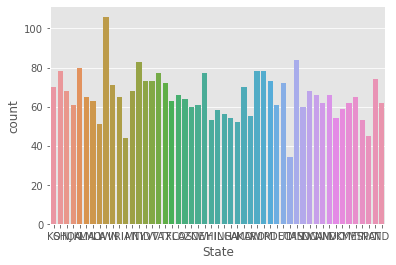

In [7]:
#Посмотрим, как распределена частота отдельных штатов и кодов
#Возможно, там будут очень редкие показатели и мы их объединим в отдельную группу
sns.countplot(x='State', data=df)

In [8]:
df['State'].value_counts()[-10:]

AR    55
GA    54
DC    54
HI    53
TN    53
AK    52
LA    51
PA    45
IA    44
CA    34
Name: State, dtype: int64

In [9]:
df['State'].value_counts()[:10]

WV    106
MN     84
NY     83
AL     80
OH     78
OR     78
WI     78
VA     77
WY     77
CT     74
Name: State, dtype: int64

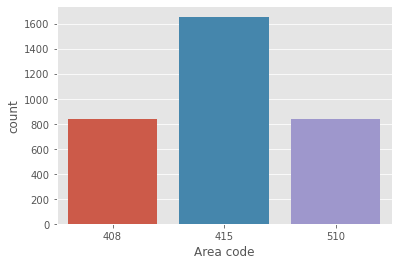

In [10]:
sns.countplot(x='Area code', data=df)

Видим, что выбросов нет
В колонке со штатами частота варьируется от 34 до 106
Кодов всего 3 вида, уникальных в них тоже нет

Теперь сделаем ohe-кодирование (присвоим категориальным переменным значения 0 или 1)
для экономии места сделаем drop_first

In [11]:
ohe = pd.get_dummies(df, drop_first=True, dummy_na=True)
ohe.head()

,Account length,Area code,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,...,State_VT,State_WA,State_WI,State_WV,State_WY,State_nan,International plan_Yes,International plan_nan,Voice mail plan_Yes,Voice mail plan_nan
0,128,415,25,265.1,110,45.07,197.4,99,16.78,244.7,...,0,0,0,0,0,0,0,0,1,0
1,107,415,26,161.6,123,27.47,195.5,103,16.62,254.4,...,0,0,0,0,0,0,0,0,1,0
2,137,415,0,243.4,114,41.38,121.2,110,10.30,162.6,...,0,0,0,0,0,0,0,0,0,0
3,84,408,0,299.4,71,50.90,61.9,88,5.26,196.9,...,0,0,0,0,0,0,1,0,0,0
4,75,415,0,166.7,113,28.34,148.3,122,12.61,186.9,...,0,0,0,0,0,0,1,0,0,0


### Решающее дерево

In [47]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import roc_auc_score

y = ohe['Churn'].values
X = ohe.drop('Churn', axis=1).values

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y)

In [48]:
#Объявляем и учим дерево:
model_tree = DecisionTreeClassifier()
model_tree.fit(X_train, y_train)

DecisionTreeClassifier()

In [49]:
#Предсказываем результат на обучающей выборке:
y_predict = model_tree.predict(X_train)

#Смотрим качество на обучающей выборке:
print('roc_auc_tree_train:', roc_auc_score(y_train, y_predict))

roc_auc_tree_train: 1.0


In [50]:
#Предсказываем на тестовой выборке:
y_predict = model_tree.predict(X_test)

#Смотрим качество на тестовой выборке:
print('roc_auct_tree_test:', roc_auc_score(y_test, y_predict))

roc_auct_tree_test: 0.793163320672816


По метрике видно, что модель сильно переобучилась, что в принципе не удивительно: мы не ставили ограничения, поэтому она фактически просто выучила значения тренировочной выборки, которые не работают для тестовой. Хотя roc-auc и для тестовой выборки получился довольно неплохим

### Cлучайный лес

In [16]:
from sklearn.ensemble import RandomForestClassifier

#Объявляем и учим лес:
forest = RandomForestClassifier()
forest.fit(X_train, y_train)

RandomForestClassifier()

In [17]:
#Предсказываем результат на обучающей выборке:
y_pred = forest.predict(X_train)

#Смотрим качество на обучающей выборке:
print('roc_auc_forest_train:', roc_auc_score(y_train, y_pred))

roc_auc_forest_train: 1.0


In [18]:
#Предсказываем результат на тестовой выборке:
y_pred = forest.predict(X_test)

#Смотрим качество на обучающей выборке:
print('roc_auc_forest_test:', roc_auc_score(y_test, y_pred))

roc_auc_forest_test: 0.8169560499186109


С лесом сиуация аналогична ситуации с решающим деревом: модель переобучилась. 
В целом точность прогнозов у случайного леса получилась ниже, чем у дерева

### Подбор гиперпараметров

In [30]:
from sklearn.model_selection import GridSearchCV


params = {'max_depth': [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15],
         'min_samples_leaf': [10, 20, 25, 30, 35, 40, 45, 50, 55, 60],
         'min_impurity_decrease': [0, 1, 2, 3, 4, 5]}
tree = DecisionTreeClassifier()
grid_tree = GridSearchCV(tree, params)
grid_tree.fit(X, y) 

GridSearchCV(estimator=DecisionTreeClassifier(),
             param_grid={'max_depth': [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,
                                       14, 15],
                         'min_impurity_decrease': [0, 1, 2, 3, 4, 5],
                         'min_samples_leaf': [10, 20, 25, 30, 35, 40, 45, 50,
                                              55, 60]})

In [57]:
grid_tree.best_estimator_

DecisionTreeClassifier(max_depth=7, min_impurity_decrease=0,
                       min_samples_leaf=10)

In [85]:
#добавим гиперпараметры при обучении дерева (min_impurity_decrease оставляем дефолтным)
model_tree = DecisionTreeClassifier(max_depth=7, min_samples_leaf=10)
model_tree.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=7, min_samples_leaf=10)

In [86]:
#Предсказываем результат на обучающей выборке:
y_predict = model_tree.predict(X_train)

#Смотрим качество на обучающей выборке:
print('roc_auc_tree_train:', roc_auc_score(y_train, y_predict))

roc_auc_tree_train: 0.8755658576493046


In [87]:
#Предсказываем на тестовой выборке:
y_predict = model_tree.predict(X_test)

#Смотрим качество на тестовой выборке:
print('roc_auct_tree_test:', roc_auc_score(y_test, y_predict))

roc_auct_tree_test: 0.8064297341291373


Видим, что с данными гиперпараметрами решающее дерево работает получше: нет переобучения, показатель roc-auc на тестовой выборке немножко подрос c 0,793 до 0,806

In [88]:
#Подберем гиперпараметры для леса:
params = {'max_depth': [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15]}
forest = RandomForestClassifier()
grid_forest = GridSearchCV(forest, params)
grid_forest.fit(X, y) 

GridSearchCV(estimator=RandomForestClassifier(),
             param_grid={'max_depth': [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,
                                       14, 15]})

In [89]:
grid_forest.best_estimator_

RandomForestClassifier(max_depth=15)

In [90]:
params = {'min_samples_leaf': [10, 20, 30, 40, 50, 60]}
forest = RandomForestClassifier()
grid_forest = GridSearchCV(forest, params)
grid_forest.fit(X, y) 

grid_forest.best_estimator_

RandomForestClassifier(min_samples_leaf=10)

In [91]:
params = {'n_estimators': [10, 20, 30, 40, 50]}
forest = RandomForestClassifier()
grid_forest = GridSearchCV(forest, params)
grid_forest.fit(X, y) 

grid_forest.best_estimator_

RandomForestClassifier(n_estimators=50)

In [92]:
#добавим гиперпараметры при обучении леса:
forest = RandomForestClassifier(max_depth=15, min_samples_leaf=10, n_estimators=50)
forest.fit(X_train, y_train)

RandomForestClassifier(max_depth=15, min_samples_leaf=10, n_estimators=50)

In [93]:
#Предсказываем результат на обучающей выборке:
y_pred = forest.predict(X_train)

#Смотрим качество на обучающей выборке:
print('roc_auc_forest_train:', roc_auc_score(y_train, y_pred))

roc_auc_forest_train: 0.7251693027906554


In [94]:
#Предсказываем результат на тестовой выборке:
y_pred = forest.predict(X_test)

#Смотрим качество на обучающей выборке:
print('roc_auc_forest_test:', roc_auc_score(y_test, y_pred))

roc_auc_forest_test: 0.654639175257732


Видим, что качество модели ухудшилось. Попробую подобрать гиперпараметры ручным поиском

In [99]:
forest = RandomForestClassifier(max_depth=14, min_samples_leaf=10)
forest.fit(X_train, y_train)

y_pred = forest.predict(X_train)
print('roc_auc_forest_train:', roc_auc_score(y_train, y_pred))

roc_auc_forest_train: 0.7564766839378239


In [100]:
y_pred = forest.predict(X_test)
print('roc_auc_forest_test:', roc_auc_score(y_test, y_pred))

roc_auc_forest_test: 0.6846898173268222


Чуть лучше, но все равно не очень

In [101]:
forest = RandomForestClassifier(max_depth=15, n_estimators = 21)
forest.fit(X_train, y_train)

y_pred = forest.predict(X_train)
print('roc_auc_forest_train:', roc_auc_score(y_train, y_pred))

roc_auc_forest_train: 0.9481865284974094


In [102]:
y_pred = forest.predict(X_test)
print('roc_auc_forest_test:', roc_auc_score(y_test, y_pred))

roc_auc_forest_test: 0.7937059142702116


С ограничением по глубине и количеству деревьев в ансамбле значение метрик получилось лучше, чем у базовой модели. Но лучшей по качеству все равно осталась модель решающего дерева с гиперпараметрами

### Прогнозы

Можно использовать модель, чтобы поделить людей на 3 большие категории:
1. С очень низкой вероятностью уйдут (например, вероятность ухода < 20%)
2. Есть довольно большая вероятность ухода (например, вероятность ухода 20-70%)
3. Уйдут с большой вероятностью (вероятность ухода >70%)

Для первых можно будет не пытаться придумывать какие-то акции, бонусы и спецпредложения, потому что они и так лояльны.

Третьи, скорее всего, уйдут в любом случае. Либо, если нам удастся их переубедить, это будет стоить слишком дорого. Поэтому проще не тратить на них деньги (а инвестировать, например, в привлечение новых клиентов) и отпустить.

Вторая группа - люди, которым, скорее всего, что-то не подходит, но они не считают оператора плохим. Наша задача - выяснить, что именно не нравится и в зависимо от этого сделать индивидуализированные предложения.

Для начала можно будет проанализировать то, какое влияние оказывают разные фичи. Выбрать те, что влияют больше всего. И по ним разбить пользователей на кластеры и в зависимости от их запросов и потребностей, предложить индивидуальные тарифы/программы/бонусы. Например, тем, кто отправляет много голосовых сообщений, сделать эту опцию безлимитной; тем кто много звонит по ночам предложить сниженную стоимость минуты в ночные часы; тем, кто много звонит за рубеж предложить тариф с более низкой ценой за звонки вне пределов страны и т.д.
